# Logic and Model-Based Reasoning

In [1]:
from utils import *
from logic import *
from copy  import *
from classes import *
import matplotlib.pyplot as plt
from IPython.display import clear_output

## **Propositional Logic**

Propositional logic is a formal language that is used to represent information, in order to reason about the truth and implications of various statements.  The basic elements of this language is a **proposition**, which is a simple true or false statement, or equivallently an assignment to one of the domain variables that make up the system being modeled. Logical **sentance** are created by combining propositions using various boolean operators.  The three fundamental boolean operators are **and**, **or**, and **not**. The truth table for these operations is shown below. 

| A | B | A **and** B | A **or** B | **not** A |
|:-:|:-:|:-------:|:------:|:-----:|
| T | T | T | T      | F     |
| T | F | F | T      | F     |
| F | T | F | T      | T     |
| F | F | F | F      | T     |

There are other boolean operators that are commonly used, but all can be reduced to some combination of the three fundamental operators.  Some of the more useful are **implies**, **iff**, and **xor**. 

The **implies** operation means that if A is true B must be true, but if A is false B may be true or false.  **iff**, or "if and only if", means that if A is true B must be true, and vice versa.  **xor** means that either A or B, but not both, must be true. The truth tables for these operations are shown below.  

| A | B | A **implies** B | A **iff** B | A **xor** B |
|:-:|:-:|:-------:|:------:|:-----:|
| T | T |    T    |    T   |   F   |
| T | F |    F    |    F   |   T   |
| F | T |    T    |    F   |   T   |
| F | F |    T    |    T   |   F   |

***Note on syntax:***

The symbols that will be used to represent each operator are shown in the table below. 

| Operator | Markdown | Code | 
|:-:|:-:|:-------:|
| **and** | $\wedge$ |&|
| **or** | $\vee$ |||
|**not** | $\neg$|~|
|**implies** |$\rightarrow$|==>, >>|
|**iff** | $\iff$ |    <=>    |

THe **interpretation** of a logical sentance is an assignment to all of the variables that make up that sentance.  If, for a given interpretation, the sentance is true than that interpretation is said to be a **model** of the sentance.  A sentance is **satisfiable** if *at least one* model of the sentance exists.  A sentance is **valid** if *any* interpretation is a model. A sentance *s* is **entailed** by a knowledge base KB (a combination of sentances already known to be true) iff it is true for all models KB (i.e. a model of KB is also a valid model of a).

To check for satisfiability of a logical sentance, it is useful to reduce it to **Conjunctive Normal Form (CNF)**.  CNF consists of **literals** - propositions or their negations - and **clauses**, which are literals combined by "or".  A sentance is CNF is a set of clauses combined by "and".  

To reduce a given sentance to CNF there are several useful identities or rules of propositional logic. 

**Implies and IFF**

$(A \rightarrow B) => (\neg A) \vee (B)$

$(A \iff B) => (A \rightarrow B)\wedge(B \rightarrow A)$

**De Morgan’s Theorem**

$\neg(A \wedge B) => (\neg A) \vee (\neg B)$

$\neg(A \vee B) => (\neg A) \wedge (\neg B)$

**Distribution**

$A \vee (B\wedge C) => (A\vee B) \wedge (A \vee C)$

$A \wedge (B\vee C) => (A\wedge B) \vee (A \wedge C)$

**Association**

$A \vee (B\vee C) => (A \vee B)\vee C$

$A \wedge (B\wedge C) => (A\wedge B) \wedge C$

**Commutation**

$A \vee B => B\vee A$

$A \wedge B => B\wedge A$

### Code Snippet 0: Practice reducing sentances to CNF
The cell below will reduce logical sentances to CNF using the function to_cnf(s).  This is useful to check practice problems.  

The input should be in the form of a logical sentance s = "((A&B)|C)&(D==>E)".  Use paraenthesis to denote order of operations.  The flag SHOW controls how much of the process is displayed. 

SHOW = False: Output is only final answer. This is the default.

SHOW = True: Output shows each step in the reduction process

This function uses the logic.py library distributed with the AIMA textbook, updated to be compatible with Python 3.x
Source: http://aima.cs.berkeley.edu/


In [2]:
SHOW = True
s = "my_logical_sentance"
to_cnf(s, SHOW)

Initial Expression:
my_logical_sentance


my_logical_sentance

#### Examples 

In [3]:
#Remove implication
s = "A==>B"
to_cnf(s)

(B | ~A)

In [4]:
#Remove iff
s = "A<=>B"
to_cnf(s)

((A | ~B) & (B | ~A))

In [5]:
#Distribution
s = "(A&B)|(C&D)"
to_cnf(s)

((C | A) & (D | A) & (C | B) & (D | B))

In [6]:
s = "(A<=>B)&(B==>C)"
to_cnf(s, True)

Initial Expression:
((A <=> B) & (B >> C))
Eliminate Implications:
(((A | ~B) & (B | ~A)) & (C | ~B))
Distribution
((A | ~B) & (B | ~A) & (C | ~B))


((A | ~B) & (B | ~A) & (C | ~B))

In [7]:
s = "(A<=>B)|~(D&C)"
to_cnf(s, True)

Initial Expression:
((A <=> B) | ~(D & C))
Eliminate Implications:
(((A | ~B) & (B | ~A)) | ~(D & C))
De Morgan's Theorem:
(((A | ~B) & (B | ~A)) | (~D | ~C))
Distribution
((A | ~B | ~D | ~C) & (B | ~A | ~D | ~C))


((A | ~B | ~D | ~C) & (B | ~A | ~D | ~C))

In [8]:
#HW 9 Problems - [For test should probably delete for submission]
#B.1
SHOW_STEPS = True
s = "~((~A&B)|(C&D))"
to_cnf(s, SHOW_STEPS)
#B.2
s = "A<=>A"
to_cnf(s, SHOW_STEPS)
#B.3
s = "(A<=>B)|C"
to_cnf(s, SHOW_STEPS)
SHOW_STEPS = True
s = "~((~A&B)|(C&D))"
to_cnf(s, SHOW_STEPS)

Initial Expression:
~((~A & B) | (C & D))
De Morgan's Theorem:
((A | ~B) & (~C | ~D))
Initial Expression:
(A <=> A)
Eliminate Implications:
((A | ~A) & (A | ~A))
Initial Expression:
((A <=> B) | C)
Eliminate Implications:
(((A | ~B) & (B | ~A)) | C)
Distribution
((A | ~B | C) & (B | ~A | C))
Initial Expression:
~((~A & B) | (C & D))
De Morgan's Theorem:
((A | ~B) & (~C | ~D))


((A | ~B) & (~C | ~D))

## **Propositional Satisfiability**

One common type of problem in propositional logic are propositional satisfiability problems; finding the set of propositions P that satisfy a sentance $\Phi$.  One of the most common ways of solving these problems is a search algorithm (DPLL) which combines backtrack search with **unit propagation**.

### Code Snippet 1: Unit Propagation
Unit propagation is the repeated application if the rule that, if all literals in a clause are false except L, then L must be true.  For a large set of clauses, that can be used repeatedly to solve for multiple variables. 

Given A = T, B = F, and the clause $(\neg A \vee B \vee C)$, unit propagation implies that the literal C must be true sice the literals $\neg A$ and $B$ are both false. 

A demonstration of unit propagation starts with a logical sentance s.

In [9]:
s = "~((~A&B)|(~C&D)|C|B)"

The first step is to reduce the sentance to a set of clauses in CNF. 

In [10]:
clauses = conjuncts(to_cnf(s))
print(clauses)

[(A | ~B), (C | ~D), ~C, ~B]


To find a valid model of the sentance, all clauses must be true.  We want the unit propagation algorithm to return all the literals of the systems it can prove are true or false according to the sentance.  This may or may not be a full assignment across all literals.  It should also return a new sentance that compactly represents the remaining clauses.   

In [11]:
# Returns clauses and a set of propositions that are true
# If ~X must be True, then X=False, and ~X shows up in the set of true 
def unit_propagation(s):
    """This implementation of unit propagation works but doesn't record support for each clause; will update"""
    clauses = check_input(s)
    
    repeat = True # this unit propagation function repeats until no changes 
    false_exp = [] #List of literals known to be false
    true_exp = [] #List of literals known to be true (inverse of false_exp, created here for convenience)
    while repeat: #Repeat the unit propagation steps until the clauses can't be reduced further
        repeat = False
        for c in clauses: #For each clause in the sentance
            if len(c.args) <= 1 and len(clauses) > 0: #if the clause contains a single literal/the list isn't empty
                cc = copy(c) #Create a copy of that literal
                if cc not in true_exp: #Check that the literal hasn't already been saved
                    true_exp.append(cc) #Add that literal to the list of true literals
                    false_exp.append(to_cnf(~cc)) #Add the negation of that literal to the list of false literals
                    repeat = True #Repeat the entire loop; since a new literal has been proven we may be able to 
                                  #propagate more
                
        for e in true_exp: #For every literal we know to be true...
            if e in clauses: clauses.remove(e) #Remove that literal from clauses where it appears. 
            
        for c in clauses: #For each clause in the sentance 
            for fe in false_exp: #For each literal we know to be false
                if fe in copy(c.args): #If that literal is in the clause 
                    if c.op != "~": #(Syntatic check)
                        c.args.remove(fe) #Remove that literal from the clause
        clauses = trim_or(clauses) #Clean up syntax
    return clauses, true_exp

s = "(A1 ==> (X1 <=>(P1&V1)))&P1&~V1&A1"
print(unit_propagation(s))

([(P1 | ~X1)], [P1, ~V1, A1, ~X1])


### Code Snippet 2: DPLL 

The DPLL algorithm works as follows:

First, an initial unit propagation.

Then, repeatedly: 
1. Assign value to unassigned proposition
2. Unit propagate 
3. Backtrack whenever clause is violated
4. If complete assignment, satisfiable. 


Unit propagation assigns values to propositions that need to equal a certain value in order for the clause to satisfy. Here's an example:

In [12]:
formula = AND.from_string_to_cnf("( X & ( Y | Z ) )") 
formula.unit_propagate().print()

( ( X = True ) & ( Y | Z ) )


Notice how there is an unassigned clause but that unit propagation can not proceed. The next step is to arbitrarily assign one of the variables, keeping the record as a support, and proceed to see whether we have a model.

In [13]:
def assign_next(formula):
    for or_clause in formula:
        for literal in or_clause:
            if literal.assignment is None:
                literal.assign(False)
                return formula

formula = AND.from_string_to_cnf("(Y | Z) & (Z | X)")
formula.literals_by_name["Y"].assign(True)
formula.unit_propagate().print()

print("here you can see unit propagation has no where to continue...")
print("Instead we perform a DPLL step.")

assign_next(formula).print()

formula.unit_propagate().print()
print("And unit propagation can finish the job!")

( ( Y = True | Z ) & ( Z | X ) )
here you can see unit propagation has no where to continue...
Instead we perform a DPLL step.
( ( Y = True | Z = False ) & ( Z = False | X ) )
( ( Y = True | Z = False ) & ( Z = False | X = True ) )
And unit propagation can finish the job!


On the other hand, see what happens when you need to backtrack!

In [14]:
formula = AND.from_string_to_cnf(" X & (Y | Z) & (Y | ~Z)") 
formula.unit_propagate().print()
print("X is equal to True by unit propagation...")
assign_next(formula).print()
print("Y is assigned False by guess... but watch what happens")
formula.unit_propagate().print()
print("Unit propagation doesn't know any better, it's just been driven into a corner!")

( ( X = True ) & ( Y | Z ) & ( Y | ~Z ) )
X is equal to True by unit propagation...
( ( X = True ) & ( Y = False | Z ) & ( Y = False | ~Z ) )
Y is assigned False by guess... but watch what happens
( ( X = True ) & ( Y = False | Z = False ) & ( Y = False | ~Z = True ) )
Unit propagation doesn't know any better, it's just been driven into a corner!


We should have guessed **True** for Y! We need a way to back up and guess again!

In [15]:
class DPLL:
    def __init__(self, formula):
        self._formula = copy(formula)
        self._formula.unit_propagate()
        self._literal_assigned = None

    def assign_next(self):
        for literal in AND.get_literals(self._formula):
            if literal.assignment is None:
                self._literal_assigned = literal
                literal.assign(False)
                return

    # returns False if already on second assignment
    def try_other_assignment(self):
        if self._literal_assigned.assignment is False:
            self._literal_assigned.assign(True)
            return True
        elif self._literal_assigned is True:
            return False

    def solve(self, print_nicely=False):
        if print_nicely: print("Hi! I'm a new DPLL working on: " + str(self._formula))

        if self._formula.is_satisfied:
            if print_nicely: print("We've found a solution! It was a pleasure to serve you.")
            return self._formula
        elif self._formula.is_complete:
            if print_nicely: print("Drats, this isn't a solution. Good luck!")
            return None

        self.assign_next()
        if print_nicely: print("I'm trying assignment: " + str(self._literal_assigned))
        sub_solve = DPLL(self._formula).solve(print_nicely)
        if sub_solve is None:
            self.try_other_assignment()
            if print_nicely: print("Woops! That didn't work. I'm instead trying: " + str(self._literal_assigned))
            sub_solve = DPLL(self._formula).solve(print_nicely)
        if sub_solve is None:
            if print_nicely: print("Shux, no more assignments possible, see ya later!")
            return None

        return sub_solve
    
    
formula = AND.from_string_to_cnf(" X & (Y | Z) & (Y | ~Z)")
DPLL(formula).solve(print_nicely=True).print()

Hi! I'm a new DPLL working on: ( ( X = True ) & ( Y | Z ) & ( Y | ~Z ) )
I'm trying assignment: Y = False
Hi! I'm a new DPLL working on: ( ( X = True ) & ( Y = False | Z = False ) & ( Y = False | ~Z = True ) )
Drats, this isn't a solution. Good luck!
Woops! That didn't work. I'm instead trying: Y = True
Hi! I'm a new DPLL working on: ( ( X = True ) & ( Y = True | Z ) & ( Y = True | ~Z ) )
I'm trying assignment: Z = False
Hi! I'm a new DPLL working on: ( ( X = True ) & ( Y = True | Z = False ) & ( Y = True | ~Z = True ) )
We've found a solution! It was a pleasure to serve you.
( ( X = True ) & ( Y = True | Z = False ) & ( Y = True | ~Z = True ) )


In this DPLL implementation we run equivalently to depth first search, and find the first solution (when there is one!). DPLL's goal is to show satisfiability. 

Above you can see DPLL trying a different assignment when its first guess didn't work. In accordance with the algorithm, DPLL calls unit_propagate before and after each search. 

## Boolean Spaceship Example

The rest of the notbook will be based on the boolean spaceship example, shown here.  This spaceship consists of two thrusters, a thrust sensor, and two batteries (it's a very narcissistic spaceship).  The diagram of the spaceship is shown here.

![title](bool_s2.JPG)


The spaceship is represented by three sets of logical statements.  The first is shown below, and it maps the component variables A1-7, R1, and C1 and C2 to the correct functioning of their componenets.  These statements map how, if a component is functioning correctly, it should behave.

In [16]:
#Boolean Spaceship Example
#Model that encodes the relationship between parts
system = []
system.append("A1 ==> (X1 <=>(P1&V1))")
system.append("A2 ==> (X2 <=>(P2&V2))")
system.append("A3 ==> (T1 <=>(X1&X2))")
system.append("A4 ==> (X3 <=>(V3&P1))")
system.append("A5 ==> (X4 <=>(V4&P2))")
system.append("A6 ==> (T2 <=>(X3&X4))")
system.append("A7 ==> (S1 <=>((T1&Y3)|(T2&Y3)))")
system.append("R1 ==> (Y3 <=>((Y1|Y2)))")
system.append("C1 ==> (Y1 <=>B1)")
system.append("C2 ==> (Y2 <=>B2)")

print("\n".join(system))

A1 ==> (X1 <=>(P1&V1))
A2 ==> (X2 <=>(P2&V2))
A3 ==> (T1 <=>(X1&X2))
A4 ==> (X3 <=>(V3&P1))
A5 ==> (X4 <=>(V4&P2))
A6 ==> (T2 <=>(X3&X4))
A7 ==> (S1 <=>((T1&Y3)|(T2&Y3)))
R1 ==> (Y3 <=>((Y1|Y2)))
C1 ==> (Y1 <=>B1)
C2 ==> (Y2 <=>B2)


The next set of statements represents the components in the system.  True/False assignments to these variables correspond to the Good/Unknown states of each component.  If all components are functioning, we can use unit propgation to express our system as more compact set of clauses linking the inputs to the outputs

In [17]:
components = []
#All components functioning
components.append("A1")
components.append("A2")
components.append("A3")
components.append("A4")
components.append("A5")
components.append("A6")
components.append("A7")
components.append("R1")
components.append("C1")
components.append("C2")

unit_prop_outcomes = unit_propagation(system+components)[1]
print("The following are True!: " + str(unit_prop_outcomes))

The following are True!: [A1, A2, A3, A4, A5, A6, A7, R1, C1, C2]


Finally, we can assign states to the inputs of the system. With all inputs fully assigned, we can use unit propagation to determine the final state of the system S1.  

In [18]:
inputs = []
#Propellant on
inputs.append("P1")
inputs.append("P2")

#Battery 1 on
inputs.append("B1")

#Battery 2 off
inputs.append("~B2")

#Valve 1 and 2 open
inputs.append("V1")
inputs.append("V2")

#Valve 2 and 3 closed
inputs.append("~V3")
inputs.append("~V4")
unit_prop_outcomes = unit_propagation(system+components+inputs)[1]
print("The following are True!: " + str(unit_prop_outcomes))

The following are True!: [A1, A2, A3, A4, A5, A6, A7, R1, C1, C2, P1, P2, B1, ~B2, V1, V2, ~V3, ~V4, X1, X2, ~X3, ~X4, Y1, ~Y2, T1, ~T2, Y3, S1]


In [19]:
sys = system+components+inputs
print("out of all the variables: " + ", ".join([str(var) for var in get_all_variables(sys)]))

out of all the variables: P1, V1, A1, X1, P2, V2, A2, X2, A3, T1, V3, A4, X3, V4, A5, X4, A6, T2, Y3, A7, S1, Y1, R1, Y2, B1, C1, B2, C2


In [20]:
inputs = "P1&P2&V1&V2&~V3&~V4&B1&~B2"
observations = "~S1"
components = []
#All components functioning
components.append("A1")
components.append("A2")
components.append("A3")
components.append("A4")
components.append("A5")
components.append("A6")
components.append("A7")
components.append("R1")
components.append("C1")
components.append("C2")

def check_conflicts(inputs,components,observations, system):
    #Returns true if a set of inputs, component assignments, and observations is a conflict for a given system
    s = make_sentance(system)+"&"+make_sentance(components)+"&"+inputs
    clauses, true_statements = unit_propagation(s)
    obs = conjuncts(to_cnf(observations))
    not_obs = []

    for o in obs:
        not_obs = (to_cnf(~o))
        if not_obs in true_statements:
            return True
        
    return False
conflicts = check_conflicts(inputs,components,observations, system)
print("Checking to see if we can find a model, we have determined the presence of conflicts is.. " + str(conflicts))

Checking to see if we can find a model, we have determined the presence of conflicts is.. True


In [21]:
prior = {"A1":.9, "A2":.9, "A3":.7, "A4":.9, "A5":.9, "A6":.7, "A7":.99, "R1":.95, "C1":.9, "C2":.8}

In [22]:
def print_diag(diagnoses, preceeding = ""):
    if len(diagnoses) == 0:
        print(preceeding)
    for diagnosis in diagnoses:
        s = preceeding
        for c in diagnosis:
            s = s + "%s = %s"%(c[0], c[1])+", "
        print(s)

In [23]:
def update_kernel_diagnoses(kernel_diagnoses,conflict, visualize = False):
    new_kernel_diagnoses = []
    candidate_diagnoses = []
    if len(kernel_diagnoses)==0:
        for e in conflict:
            new_kernel_diagnoses.append(set([(e[0],0)]))
    else:
        for k in kernel_diagnoses:
            for c in conflict:
                k_new = copy(k)
                k_new.add((c[0],0))
                if k_new not in new_kernel_diagnoses:
                    new_kernel_diagnoses.append(k_new)
        for i in range(len(new_kernel_diagnoses)):
            nk = new_kernel_diagnoses.pop(0)
            for ok in copy(new_kernel_diagnoses):
                if nk.issubset(ok):
                    new_kernel_diagnoses.remove(ok)            
            new_kernel_diagnoses.append(nk)                            
    return new_kernel_diagnoses

conflict = set([('A1',1),('A2',1),('X1',1)])
print_conf(conflict)
kd = update_kernel_diagnoses([], conflict, True)
print_diag(kd, "KD: ")
conflict = set([('A1',1),('A3',1),('X1',1),('X2',1)])
kd = update_kernel_diagnoses(kd, conflict, True)
print_diag(kd)

Conflict: X1 = 1, A2 = 1, A1 = 1
KD: X1 = 0, 
KD: A2 = 0, 
KD: A1 = 0, 
A1 = 0, 
X1 = 0, 
A2 = 0, A3 = 0, 
A2 = 0, X2 = 0, 


In [28]:
class Spaceship():
    def create_system(self):
        system = []
        system.append("A1 ==> (X1 <=>(P1&V1))")
        system.append("A2 ==> (X2 <=>(P2&V2))")
        system.append("A3 ==> (T1 <=>(X1&X2))")
        system.append("A4 ==> (X3 <=>(V3&P1))")
        system.append("A5 ==> (X4 <=>(V4&P2))")
        system.append("A6 ==> (T2 <=>(X3&X4))")
        system.append("A7 ==> (S1 <=>((T1&Y3)|(T2&Y3)))")
        system.append("R1 ==> (Y3 <=>((Y1|Y2)))")
        system.append("C1 ==> (Y1 <=>B1)")
        system.append("C2 ==> (Y2 <=>B2)")
        return system
    
    def update_colors(self):
        #Draw good components in blue and unknown components in red
        for c in self.components:
            if self.components[c]._assignment == False:
                self.comp_dict[c] = (*self.comp_dict[c][0:5],'r')
            else:
                self.comp_dict[c] = (*self.comp_dict[c][0:5],'c')
    def __init__(self):
        self.system = self.create_system()
        self.inputs = {"P1":L("P1",False),
                      "P2":L("P2",False),
                      "V1":L("V1",False),
                      "V2":L("V2",False),
                      "V3":L("V3",False),
                      "V4":L("V4",False),
                      "B1":L("B1",False),
                      "B2":L("B2",False),}
        self.components = {"A1":L("A1",True),
                          "A2":L("A2",True),
                          "A3":L("A3",True),
                          "A4":L("A4",True),
                          "A5":L("A5",True),
                          "A6":L("A6",True),
                          "A7":L("A7",True),
                          "R1":L("R1",True),
                          "C1":L("C1",True),
                          "C2":L("C2",True)}
        
        self.comp_dict = {"A4":(25,50,8,8,'k','c'),
                 "A1":(5,65,8,8,'k','c'),
                 "A3":(7.5,25,10,8,'k','c'),
                 "A2":(10,55,8,8,'k','c'),
                 "A5":(30,40,8,8,'k','c'),
                 "A6":(27.5,25,10,8,'k','c'),
                 "A7":(17.5,10,15,8,'k','c'),
                 "C2":(65,65,8,8,'k','c'),
                 "C1":(55,65,8,8,'k','c'),
                 "R1":(60,40,15,8,'k','c'),
                }
        self.inp_dict = {"P1":(5,75, 'k'),
               "P2":(30,75, 'k'),
               "V1":(-15,65, 'k'),
               "V2":(-15,55, 'k'),
               "V3":(-15,48, 'k'),
               "V4":(-15,40, 'k'),
               "B2":(65,75, 'k'),
               "B1":(50,75, 'k'),
               "X1":(0,44,'g'),
                "X2":(15,44,'b'),
                "X3":(20,33,'g'),
                "X4":(37,32,'b'),
                "T1":(0,15,'r'),
                "T2":(35,15,'r'),
                "Y1":(50,50,'k'),
                "Y2":(70,50,'k'),
                "Y3":(65,20,'k'),
                "S1":(18,-5,'k'),
               }
        self.line_dict = {"l1":([5,5],[73,68], 'g'),
                "l2":([5,25, 25],[70,70, 53], 'g'),
                "l3":([30,30],[73,43], 'b'),
                "l4":([30,10, 10],[63,63,58], 'b'),
                "l5":([30,30],[36,29], 'b'),
                "l6":([25,25],[46,29], 'g'),
                "l7":([10,10],[51,29], 'b'),
                "l8":([5,5],[61,29], 'g'),
                "l9":([-5,1],[65,65], 'k'),#V1 to A1
                "l10":([-5,6],[55,55], 'k'),#V2 to A2
                "l11":([-5,21],[48,48], 'k'),#V3 to A4
                "l12":([-5,26],[40,40], 'k'),#V4 to A5
                "l13":([7.5, 7.5, 12.5,12.5], [21, 18, 18,14], 'r'),#A3 to A7
                "l14":([27.5, 27.5, 22.5,22.5], [21, 18, 18,14], 'r'),#A3 to A7
                "l15":([65,65],[69,73],'k'),#B2 to C2
                "l16":([55,55],[69,73],'k'),#B1 to C1
                "l17":([65,65],[61,44],'k'),#B1 to C1
                "l18":([55,55],[61,44],'k'),#B1 to C1
                "l19":([60,60,25],[36,10,10],'k'),#R1 to A7
                "l20":([18,18],[5,0],'k')
                }
    
    def change_input(self,inp,new_value):
        #Change the state of an input
        self.inputs[inp] = L(inp,new_value)
        
    def change_component(self,comp,new_value):
        #Change the state of a component
        self.components[comp] = L(comp,new_value)
        self.update_colors()
        
    def all_unknown(self):
        #Set all components in the ship to unknown
        for c in self.components:
            self.change_component(c,False)
            
    def initialize(self):
        #Turn on a nominally working set of valves
        self.change_input("B1",True)
        self.change_input("P1",True)
        self.change_input("P2",True)
        self.change_input("V1",True)
        self.change_input("V2",True)
        
    def make_sentance(self,structure):
        #Make sentance specifically for dict data strucutres
        s = ""
        for e in structure:
            a = structure[e]._name
            val = structure[e]._assignment
            if val:
                c = a
            else:
                c = "~"+a
            if s == "":
                s = "("+c+")"
            else:
                s += "&("+c+")"
        return s
    def plot_spaceship(self):
        #Draw the current state of the spaceship
        plt.clf()
        plt.axes()
        ax = plt.gca()

        for i in self.comp_dict:
            t = self.comp_dict[i]
            x = t[0]
            y = t[1]
            lx = t[2]
            ly = t[3]
            col = t[4]
            ax.add_patch(plt.Rectangle((x-lx/2.,y-ly/2.), lx, ly,  fill=True,fc=t[5], ec=col))
            plt.text(x,y,i, fontsize = 18, horizontalalignment = "center",verticalalignment = "center")

        for i in self.inp_dict:
            t = self.inp_dict[i]
            x = t[0]
            y = t[1]
            if i in self.inputs:
                ps = i + "=" + str(int(self.inputs[i]._assignment))
            else:
                ps = i
                    
            plt.text(x,y,ps,fontsize=18,color=t[2], horizontalalignment = "center",verticalalignment = "center")

        for l in self.line_dict:
            t = self.line_dict[l]
            plt.plot(t[0], t[1], color = t[2])


        #plt.axis('scaled')
        plt.xlim(-10,80)
        plt.axis('off')
        plt.show()
    def check_conflicts(self,observations):
        #Check if the current state of the spaceship is in conflict
        #Returns true if a set of inputs, component assignments, and observations is a conflict for a given system
        snt = make_sentance(self.system)+"&"+self.make_sentance(self.components)+"&"+self.make_sentance(self.inputs)
        clauses, true_statements = unit_propagation(snt)
        obs = conjuncts(to_cnf(observations))
        
        not_obs = []

        for o in obs:
            not_obs = (to_cnf(~o))
            if not_obs in true_statements:
                return True

        return False

    
     
s = Spaceship()
s.initialize()
s.all_unknown()

In [25]:
def parse_input(a,s):
    to_change = []
    cmps = a.split(',')
    for c in cmps:
        if c in s.components:
            to_change.append(c)
    return to_change

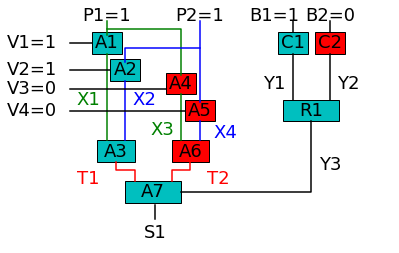

True

In [30]:
s = Spaceship()
s.initialize()
s.all_unknown()
obs = "~S1"
s.update_colors()
s.plot_spaceship()
print("Input the components to check for conflict, separated by commas")
a = input()
cmps = parse_input(a,s)
for c in cmps:
    s.change_component(c,True)
clear_output()
s.plot_spaceship()
s.check_conflicts(obs)
#print(s.components)

#print(a)